In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

X.shape : (26, 2)


c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


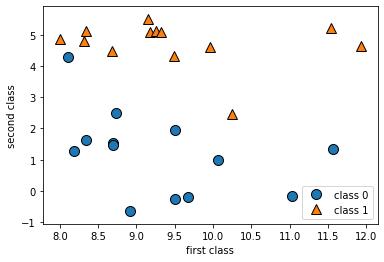

In [5]:
X, y = mglearn.datasets.make_forge()  # 데이터셋을 만듦
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  # 산점도를 그림
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first class")
plt.ylabel("second class")
print("X.shape : {}".format(X.shape))

Text(0, 0.5, 'target')

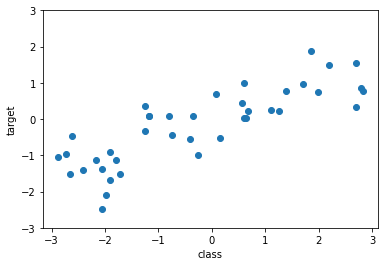

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("class")
plt.ylabel("target")

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() :  \n{}".format(cancer.keys()))
print(cancer.data.shape)

cancer.keys() :  
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [8]:
print("클래스 별 샘플 개수 : \n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스 별 샘플 개수 : 
{'malignant': 212, 'benign': 357}


In [12]:
print("특성이름 : \n{}".format(cancer.feature_names))

특성이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


회귀분석용 데이터셋으로는 보스턴 주택가격 데이터셋을 사용   
범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측

In [13]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : {}".format(boston.data.shape))

데이터의 형태 : (506, 13)


#### 특성공학(Feature Engineering)
13개의 입력특성 뿐 아니라 특성끼리 곱하여(상호작용) 확장  
ex) 범죄율과 고속도로 접근성의 개별특성은 물론, 범죄율과 고속도로 접근성의 곱도 특성으로 생각  
13개의 원래 특성에 13개에서 2개씩 짝지은 91개의 특성을 더해 총 104개가 되어있는 데이터(중복 포함)

In [14]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

X.shape : (506, 104)


### 2.3.2 k-최근접 이웃  
가장 간단한 머신러닝 알고리즘(현재는 속도 문제로 많이 사용하지 않음). 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부  
새로운 데이터 포인트에 대해 예측할 때 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 최근접 이웃을 찾는다. 

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


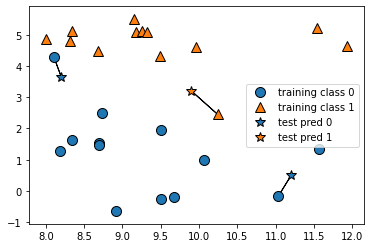

In [16]:
# forge 데이터셋에 대한 1-최근접 이웃 모델의 예측
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


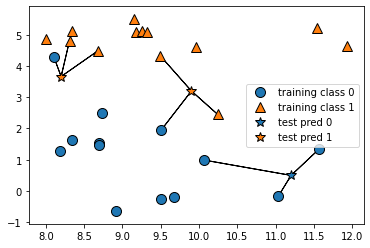

In [17]:
#forge 데이터셋에 대한 3-최근접 이웃 모델의 예측
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
#1장에서 한 것처럼 일반화 성능을 평가할 ㅅ 있도록 데이터를 훈련세트/테스트세트로 나눈다. 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
#KNeighborsClassifier를 Import 하고 객체를 만든다. 그리고 이웃의 수 지정. 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
#훈련세트를 이용하여 분류 모델을 학습시킴. KNeighborsClassifier의 경우 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#테스트 데이터에 대해 predict 메서드를 호출해서 예측. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다. 
print("테스트 세트 예측 : {}".format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [26]:
#모델이 얼마나 잘 일반화 되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어서 호출
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


### KNeighborsClassfier 분석
2차원 데이터 셋이므로 가능한 모든 테스트 포인트의 예측을 x, y 평면에 그려볼 수 있음.   
그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠함  
이렇게 하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계 (decision boundary) 를 볼 수 있음.  

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


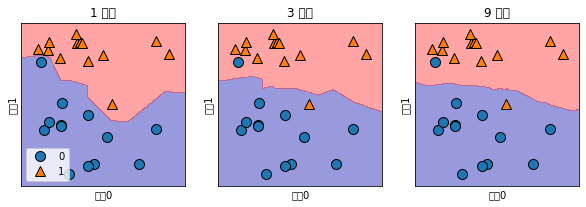

In [31]:
#이웃이 하나, 셋, 아홉 개일 떄의 결정 경계
fir, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in (zip([1, 3, 9], axes)):
    # fit 메서드는 self 객체를 반환
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
axes[0].legend(loc=3)

# 부드러운 경계는 더 단순한 모델을 의미, 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도가 낮아짐. 
# 훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 됨. 

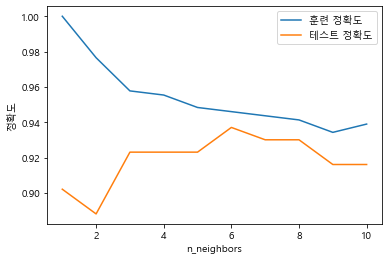

In [35]:
# 모델의 복잡도와 일반화 사이 관계 입증
# 실제 데이터인 유방암 데이터 사용
# 훈련세트와 테스트세트로 나누고, 이웃의 수를 달리하여 훈련 세트와 테스트 세트의 성능을 평가

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuray = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuray.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuray, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.legend()

# 과대적합과 과소적합의 특징을 볼 수 있음. 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태
# 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽, 하지만 이웃이 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦. 
# 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다. >> 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 의미.
# 반대로 이웃을 10개 썼을 때에는 모델이 너무 단순해서 정확도가 나빠짐. 정확도가 가장 좋을 때에는 중간 정도인 여섯개를 사용한 경우. 

#### K-최근접 이웃 회귀
k-최근접 이웃 알고리즘은 회귀 분석에도 쓰인다.  
wave 데이터셋을 이용, 이웃이 하나인 최근접 이웃 구현. 
X축에 세 개 의 테스트 데이터를 흐린 별 모양으로 표시, 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃. 

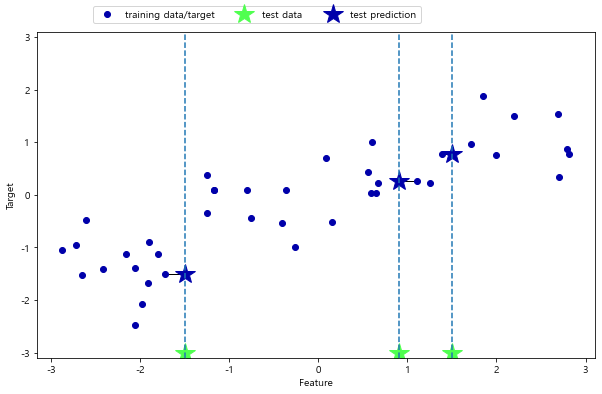

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

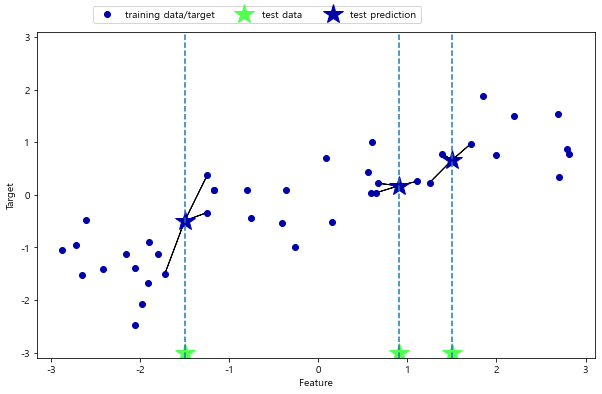

In [39]:
# 이웃을 둘 이상 사용하여 회귀 분석 가능. 여러 개의 최근접 이웃을 사용할 땐 이웃간의 평균이 예측이 됨. 
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [52]:
# sklearn에서 회귀를 위한 k-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

#훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

#훈련데이터와 타깃데이터로 모델 학습
reg.fit(X_train, y_train)

#테스트 세트에 대해 예측
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))

# score 메소드를 사용해 모델을 평가
# 회귀일땐 R^2을 반환. 회귀 모델에서 예측의 적합도를 0과 1사이의 값으로 계산. 
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


#### KNeighborsRegressor 분석

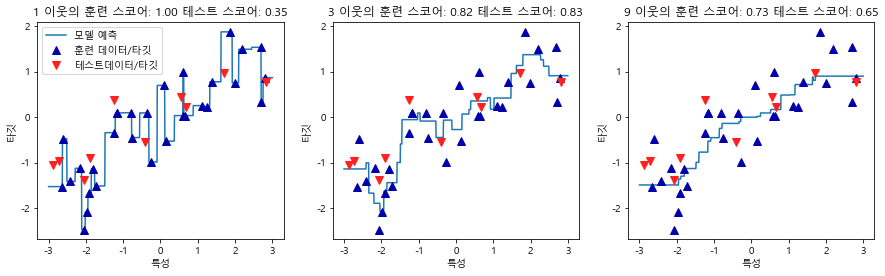

In [54]:
# 1차원 데이터셋에 대해 가능한 모든 특성값을 만들어 예측해볼 수 있음
# X축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만든다.

fir, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )

    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트데이터/타깃"], loc="best")

### 2.3.3 선형 모델(linear model)
입력 특성에 대한 선형 함수를 만들어 예측을 수행

w[0]: 0.393906  b: -0.031804


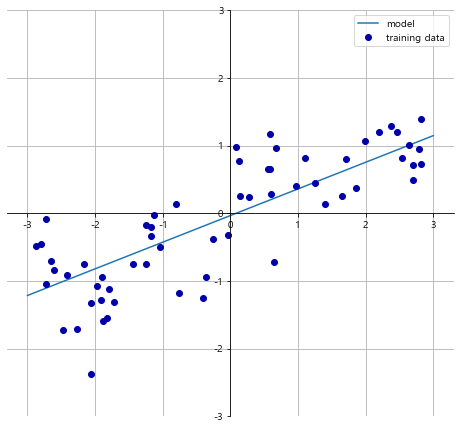

In [55]:
# 1차원 wave 데이터셋 학습
# 훈련 데이터보다 특성이 더 많은 경우에는 어떤 타깃 y도 완벽하게 훈련 세트에 대해서 선형 함수로 모델링 할 수 있다. 
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(최소제곱법)
선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다. 

In [60]:
from sys import call_tracing
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
# 기울기 파라미터는 가중치(weight) 또는 계수(coefficient) 라고 하며 lr 객체의 coef_ 속성에 저장되어있음
# 편향(offset) 또는 절편(intercept)파라미터는 intercept_ 속성에 저장되어있음
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

# 0.66이 좋은 결과는 아니지만, 훈련 세트와 테스트 세트의 점수가 비슷하다면 과소적합을 의미함 
# 1차원 데이터에서는 상관없지만, 고차원 데이터셋에서는 과대적합의 가능성이 높다. 
# 유도된 특성까지 104개의 특성을 가진 보스턴 주택가격 데이터셋을 통해 이를 확인해보자. 
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

#훈련 데이터와 테스트 데이터의 성능차이는 모델이 과대적합되었다는 확실한 신호이므로, 복잡도를 제어할 수 있는 모델을 사용해야함

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수 : 0.66


ValueError: too many values to unpack (expected 2)